In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
DATASET = 'compas'
sensitive_0_val = 'white'
sensitive_1_val = 'black'

In [27]:
DATASET = 'income'
sensitive_0_val = 'male'
sensitive_1_val = 'female'

In [28]:
obj = (pd.read_csv('../utils/'+str(DATASET)+'_ftrial_new.csv').values)
cons1 = (pd.read_csv('../utils/'+str(DATASET)+'_ctrial1_new.csv').values)
cons2 = (pd.read_csv('../utils/'+str(DATASET)+'_ctrial2_new.csv').values)

In [29]:
maxiter = len(obj)
obj.shape

(200, 22)

In [30]:
for i in range(0, len(obj)):
    obj[i, :] = np.sort(obj[i, :])
    cons1[i, :] = np.sort(cons1[i, :])
    cons2[i, :] = np.sort(cons2[i, :])

In [31]:
quart_ind = int(obj.shape[1]/4)
mid_ind = int(obj.shape[1]/2)
three_quart_ind = int((3*obj.shape[1])/4)

[]

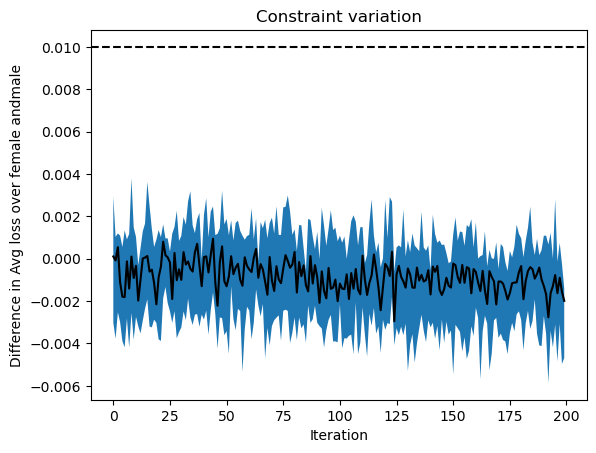

In [32]:
plt.plot(range(0, maxiter), cons1[:, mid_ind], 'k-')
plt.fill_between(range(0, maxiter), cons1[:, quart_ind], cons1[:, three_quart_ind])
#plt.axhline(y=-0.001, color='black', linestyle='--', label='Horizontal Line at y=3')
plt.axhline(y=1e-2, color='black', linestyle='--', label='Horizontal Line at y=3')
# plt.plot(range(0, maxiter+1), convals[:, 0], 'k-')
# plt.fill_between(range(0, maxiter+1), convals[:, 0], convals[:, 1])
plt.title("Constraint variation")
plt.xlabel('Iteration')
plt.ylabel('Difference in Avg loss over '+str(sensitive_1_val)+' and'+ str(sensitive_0_val))
#plt.yscale('log')
plt.plot()

[]

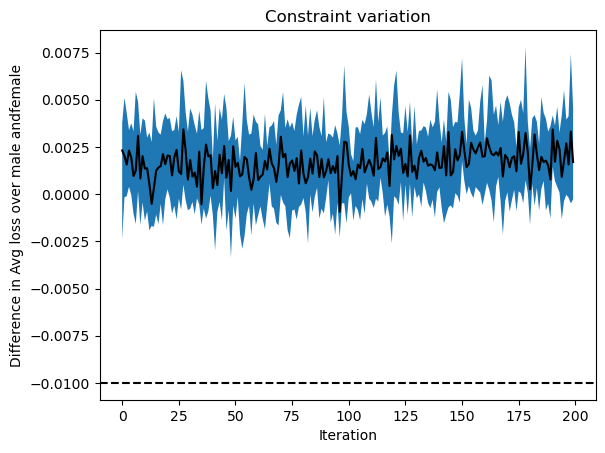

In [33]:
plt.plot(range(0, maxiter), cons2[:, mid_ind], 'k-')
plt.fill_between(range(0, maxiter), cons2[:, quart_ind], cons2[:, three_quart_ind])
#plt.axhline(y=-0.001, color='black', linestyle='--', label='Horizontal Line at y=3')
plt.axhline(y=-1e-2, color='black', linestyle='--', label='Horizontal Line at y=3')
# plt.plot(range(0, maxiter+1), convals[:, 0], 'k-')
# plt.fill_between(range(0, maxiter+1), convals[:, 0], convals[:, 1])
plt.title("Constraint variation")
plt.xlabel('Iteration')
plt.ylabel('Difference in Avg loss over '+str(sensitive_0_val)+' and'+ str(sensitive_1_val))
#plt.yscale('log')
plt.plot()

In [35]:
cons = (cons1+cons2)/2

[]

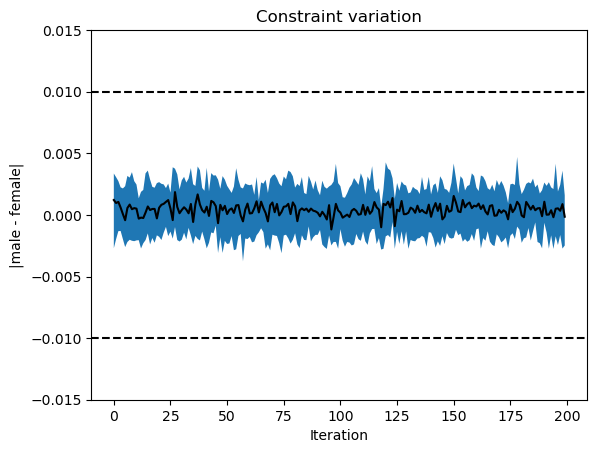

In [36]:
plt.plot(range(0, maxiter), cons[:, mid_ind], 'k-')
plt.fill_between(range(0, maxiter), cons[:, quart_ind], cons[:, three_quart_ind])
plt.axhline(y=-1e-2, color='black', linestyle='--', label='Horizontal Line at y=3')
plt.axhline(y=1e-2, color='black', linestyle='--', label='Horizontal Line at y=3')
# plt.plot(range(0, maxiter+1), convals[:, 0], 'k-')
# plt.fill_between(range(0, maxiter+1), convals[:, 0], convals[:, 1])
plt.ylim(-0.015, 0.015)
plt.title("Constraint variation")
plt.xlabel('Iteration')
plt.ylabel('|'+str(sensitive_0_val)+' - '+str(sensitive_1_val)+'|')
#plt.yscale('log')
plt.plot()

[]

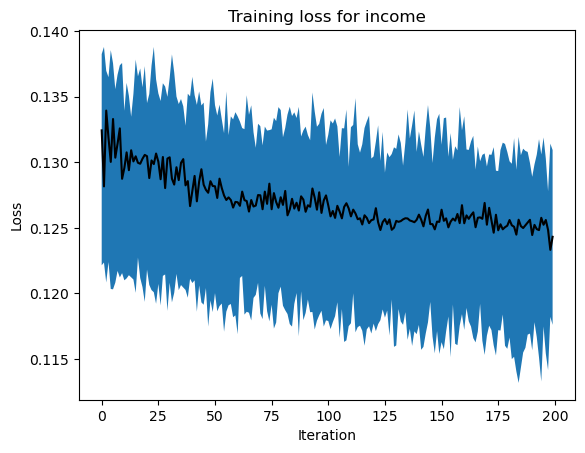

In [37]:
plt.plot(range(0, maxiter), obj[:, mid_ind], 'k-')
plt.fill_between(range(0, maxiter), obj[:, quart_ind], obj[:, three_quart_ind])
# plt.plot(range(0, maxiter+1), convals[:, 0], 'k-')
# plt.fill_between(range(0, maxiter+1), convals[:, 0], convals[:, 1])
plt.title("Training loss for "+DATASET)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.plot()